In [5]:
# add path 
import sys
sys.path.append('../../')
sys.path.append('../')

In [6]:
from train_utils import *
from plot import *

# Saving Band Combinaitons to be used in the Figures


```
['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',
'clayIndex','ferrousIndex','carbonateIndex','rockOutcropIndex','NDVI',
'elevation','slopePCT']
```


In [ ]:
import cv2
from skimage import io
import cmapy

In [ ]:
band_names = ['SR_B1','SR_B2','SR_B3','SR_B4','SR_B5','SR_B6','SR_B7',
'clayIndex','ferrousIndex','carbonateIndex','rockOutcropIndex','NDVI',
'elevation','slopePCT']

In [ ]:
IMG_NAME = "26581768_150101.tif"
img_name_wo_ext = IMG_NAME.split(".")[0]
IMG_PATH ="D:\\python\\SoilNet\\dataset\\l8_images\\test\\"
IMG_ADDRESS = IMG_PATH + IMG_NAME

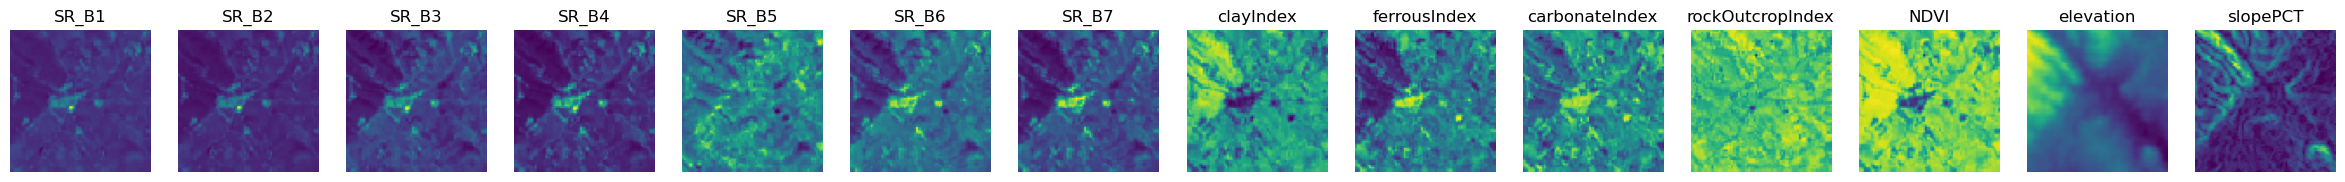

In [ ]:
# read a tif file using io.imread
img = io.imread(IMG_ADDRESS)
# ploting each channel of the image separately using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,img.shape[0], figsize=(30,30))
for i in range(img.shape[0]):
    ax[i].imshow(img[i,:,:])
    ax[i].set_title(band_names[i])
    ax[i].axis('off')

## RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Lossy conversion from float64 to uint8. Range [-0.005272500000000013, 0.2965125]. Convert image to uint8 prior to saving to suppress this warning.


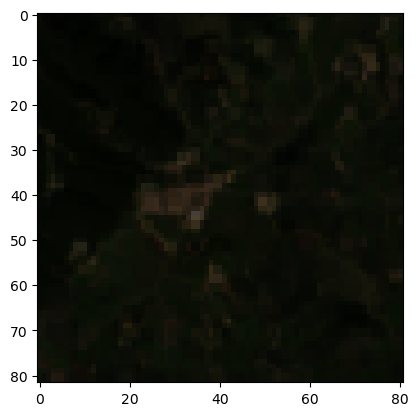

In [ ]:
rgb = img[[3,2,1],:,:].transpose(1,2,0)
plt.imshow(rgb)
# save the image as jpg
io.imsave(img_name_wo_ext+'_rgb.jpg', rgb)

## NDVI

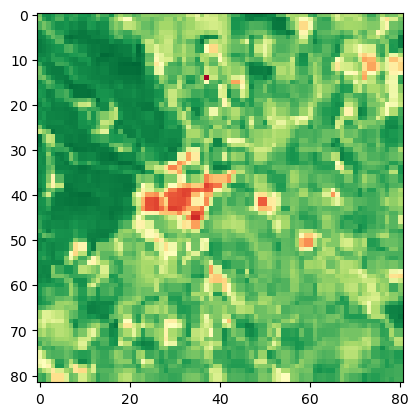

In [ ]:
ndvi = img[11,:,:]
plt.imshow(ndvi, cmap='RdYlGn')
ndvi = convert2uint8(normalize(ndvi))
ndvi = cv2.applyColorMap(ndvi, cmapy.cmap('RdYlGn'))
ndvi = cv2.cvtColor(ndvi, cv2.COLOR_BGR2RGB)
# save the image as jpg
io.imsave(img_name_wo_ext+'_ndvi.jpg', ndvi)

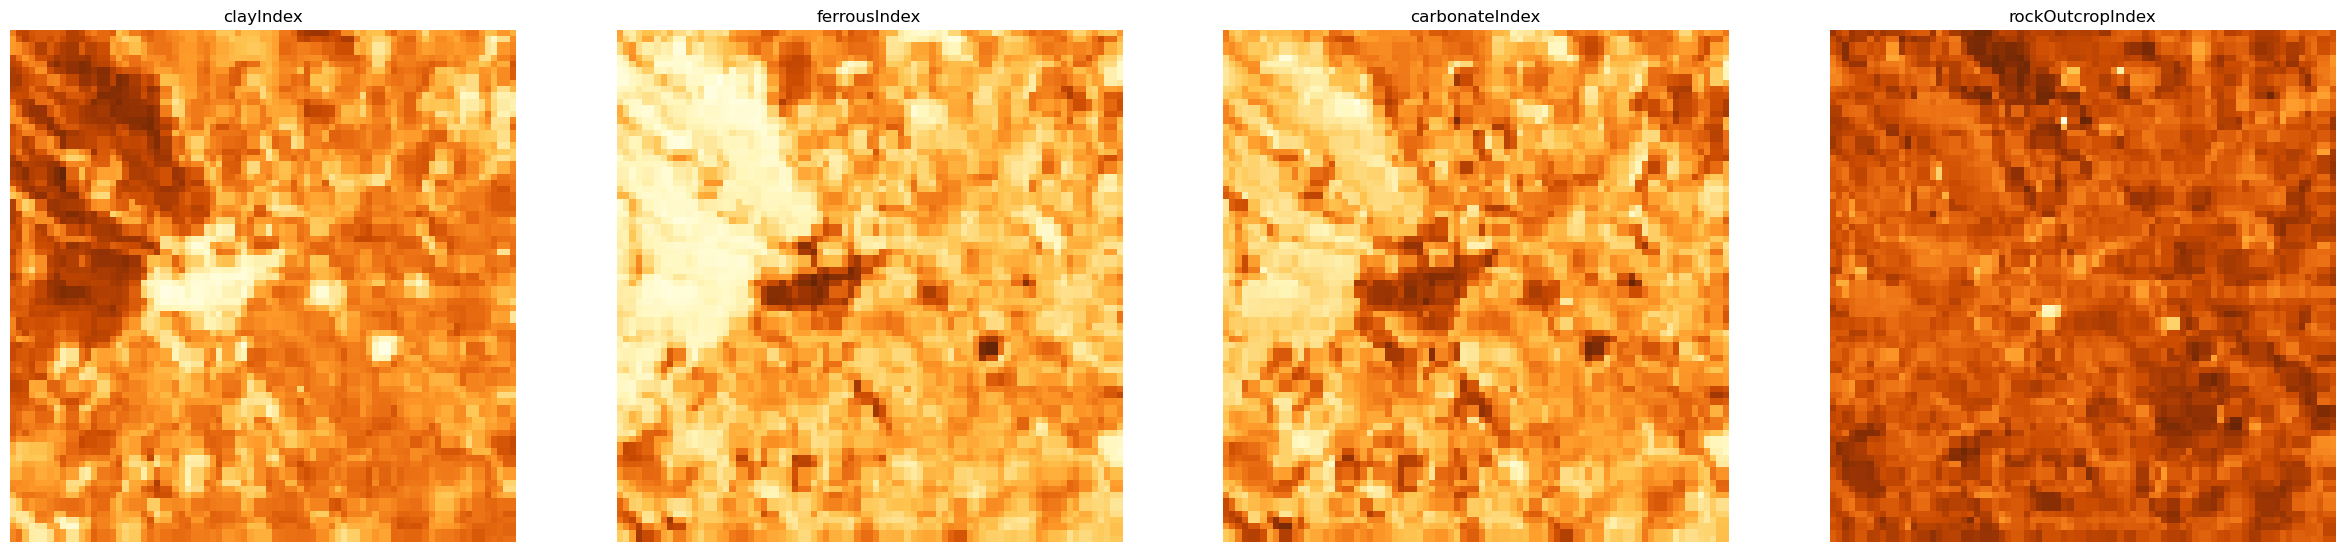

In [ ]:
# Ploting and saving the soil indecies with cmap='YlOrBr'
soil_indecies_names = ['clayIndex','ferrousIndex','carbonateIndex','rockOutcropIndex']
clay = img[7,:,:]
ferrous = img[8,:,:]
carbonate = img[9,:,:]
rockOutcrop = img[10,:,:]
soil_indecies = [clay, ferrous, carbonate, rockOutcrop]
fig, ax = plt.subplots(1,4, figsize=(30,30))
for i in range(4):
    ax[i].imshow(soil_indecies[i], cmap='YlOrBr')
    ax[i].set_title(soil_indecies_names[i])
    ax[i].axis('off')
    # save the image as jpg
    colored = convert2uint8(normalize(soil_indecies[i]))
    colored = cv2.applyColorMap(colored, cmapy.cmap('YlOrBr'))
    colored = cv2.cvtColor(colored, cv2.COLOR_BGR2RGB)
    io.imsave(img_name_wo_ext+'_'+soil_indecies_names[i]+'.jpg', colored)
    


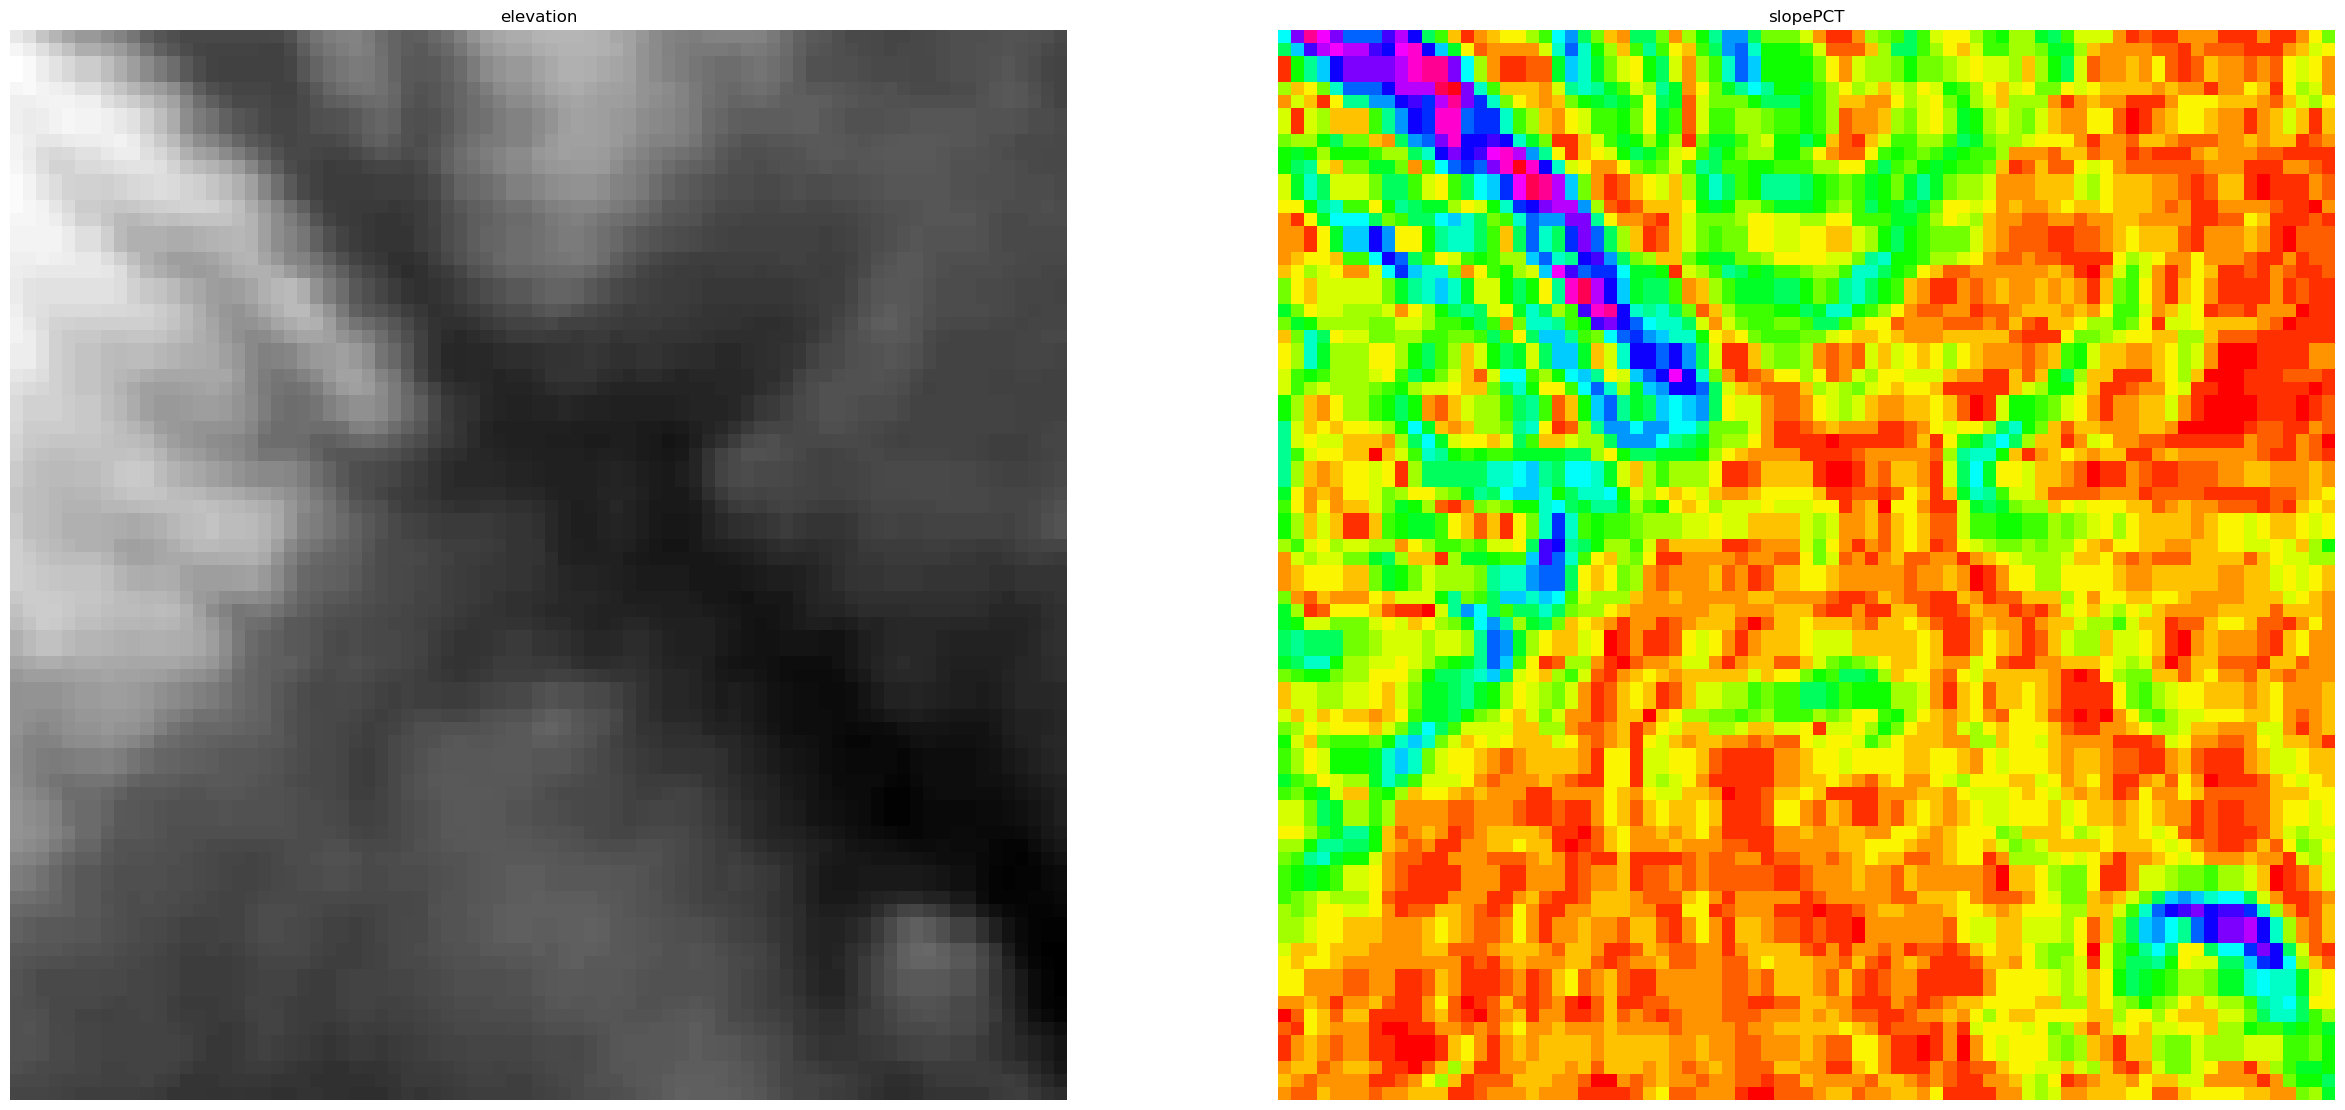

In [ ]:
elevation_names = ['elevation','slopePCT']
elev = img[12,:,:]
slope = img[13,:,:]
elevation = [elev, slope]
fig, ax = plt.subplots(1,2, figsize=(30,30))
for i in range(2):
    cmap = 'gray' if i==0 else 'hsv'
    ax[i].imshow(elevation[i], cmap=cmap)
    ax[i].set_title(elevation_names[i])
    ax[i].axis('off')
    # save the image as jpg
    colored = convert2uint8(normalize(elevation[i]))
    colored = cv2.applyColorMap(colored, cmapy.cmap(cmap))
    colored = cv2.cvtColor(colored, cv2.COLOR_BGR2RGB)
    io.imsave(img_name_wo_ext+'_'+elevation_names[i]+'.jpg', colored)